In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import pandas as pd
from pysr import PySRRegressor
import rcpresentation

In [2]:
model = PySRRegressor()

# Funzioni

In [3]:
def error(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return

    l = len(data)
    error = np.zeros(l)  # Inizializza un array numpy di zeri della stessa lunghezza di data e model

    for i in range(l):
        if data[i] != 0:
            error[i] = 100 * abs((data[i] - model[i]) / data[i])

    return error

In [4]:
def TF1var(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    plt.loglog(x[0:114], T_1[0:114],lw=2.5,alpha=0.7, label='SR from PySR', color='r')
    plt.scatter(x[0:114][::2],T[0:114][::2], s=10, label='CLASS data', color='k')
    plt.scatter(x[113],T[113], s=10, color='k')
    
    plt.xlabel(r'$k$')
    plt.ylabel(r'$T(k)$')
    plt.legend()

In [5]:
def TFNvar(x,y,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(y)
    plt.loglog(x[0:114], T_1[0:114],lw=2.5,alpha=0.7, label='SR from PySR', color='r')
    plt.scatter(x[0:114][::2],T[0:114][::2], s=10, label='CLASS data', color='k')
    plt.scatter(x[113],T[113], s=10, color='k')
    
    plt.xlabel(r'$k$')
    plt.ylabel(r'$T(k)$')
    plt.legend()

In [6]:
def err1var(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    plt.loglog(x[0:114],error(T,T_1)[0:114], color='blue',label=r'$\%$ error')
    plt.axhline(5, linestyle='--',color='k', label='5% difference')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\%$ error')
    plt.legend()

In [7]:
def errNvar(k,y,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(y)
    plt.loglog(k[0:114],error(T,T_1)[0:114], color='blue',label=r'$\%$ error')
    plt.axhline(5, linestyle='--',color='k', label='acceptance treshold')
    plt.xlabel(r'$k \ [h/$Mpc$]$')
    plt.axhline(5, linestyle='--',color='k', label='5% difference')
    plt.legend()

In [23]:
def plot1var(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)

    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    # Primo sottografo (sopra)
    ax1 = plt.subplot(gs[0])
    ax1.loglog(x[0:114], T_1[0:114],lw=2.5,alpha=0.7, label='SR from PySR', color='r')
    ax1.scatter(x[0:114][::2],T[0:114][::2], s=10, label='CLASS data', color='k')
    ax1.scatter(x[113],T[113], s=10, color='k')
    ax1.set_ylabel(r'$T(q)$')
    ax1.legend()

    # Secondo sottografo (sotto)
    ax2 = plt.subplot(gs[1], sharex=ax1)
    ax2.plot(x[0:114],error(T,T_1)[0:114], color='blue',label=r'$\%$ error')
    ax2.axhline(5, linestyle='--',color='k', label='5% difference')
    ax2.set_xlabel(r'$q$')
    ax2.set_ylabel(r'$\%$ error')
    ax2.legend()

    # Regola gli spazi tra i sottografi in modo che il bordo inferiore del grafico sopra coincida con il bordo superiore del grafico sotto
    plt.subplots_adjust(hspace=0)




In [14]:
def plotNvar(x,y,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(y)

    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    # Primo sottografo (sopra)
    ax1 = plt.subplot(gs[0])
    ax1.loglog(x[0:114], T_1[0:114],lw=2.5,alpha=0.7, label='SR from PySR', color='r')
    ax1.scatter(x[0:114][::2],T[0:114][::2], s=10, label='CLASS data', color='k')
    ax1.scatter(x[113],T[113], s=10, color='k')
    ax1.set_ylabel(r'$T(k)$')
    ax1.legend()

    # Secondo sottografo (sotto)
    ax2 = plt.subplot(gs[1], sharex=ax1)
    ax2.plot(x[0:114],error(T,T_1)[0:114], color='blue',label=r'$\%$ error')
    ax2.axhline(5, linestyle='--',color='k', label='5% difference')
    ax2.set_xlabel(r'$k$')
    ax2.set_ylabel(r'$\%$ error')
    ax2.legend()

    # Regola gli spazi tra i sottografi in modo che il bordo inferiore del grafico sopra coincida con il bordo superiore del grafico sotto
    plt.subplots_adjust(hspace=0)

# GRAFICI $P(k)$

In [15]:
tf = pd.read_csv('TF_16.csv')
k = tf['k (h/Mpc)'].values
z = (tf['k (h/Mpc)']/tf['omega_m']).values
x = tf['x'].values
y = pd.DataFrame({'k': tf['k (h/Mpc)'], 'om_b': tf['omega_b'],'om_m': tf['omega_m']})
T = tf['T(k)'].values
x = x.reshape(-1,1)
z = z.reshape(-1,1)

Checking if model1-0709.pkl exists...
Loading model from model1-0709.pkl


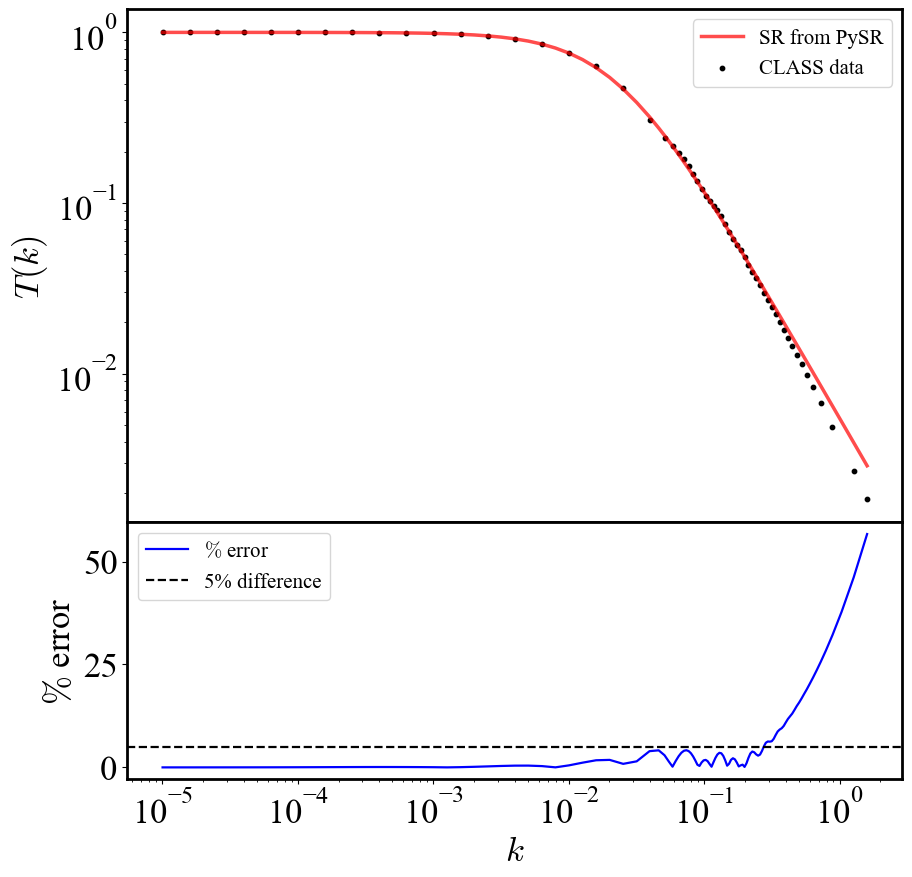

In [18]:
plotNvar(k,y,T,'model1-0709.pkl')
    plt.savefig('presTF1.pdf')

Checking if hall_of_fame_2023-10-08_162339.734.pkl exists...
Loading model from hall_of_fame_2023-10-08_162339.734.pkl


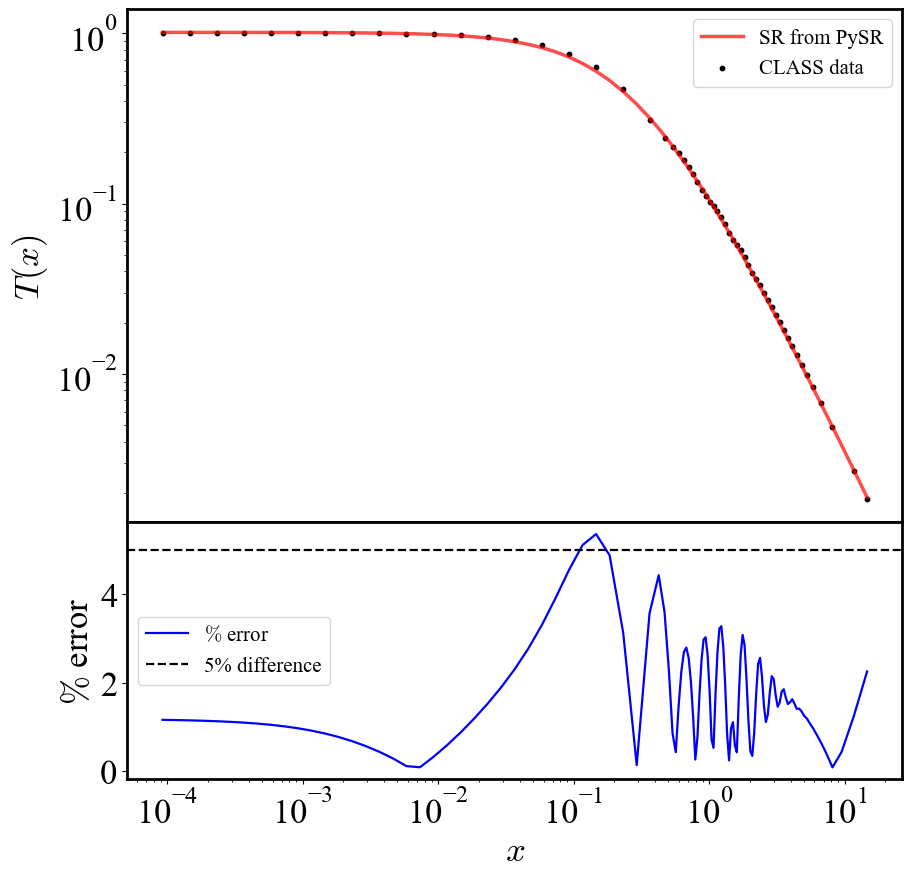

In [20]:
plot1var(x,T,'hall_of_fame_2023-10-08_162339.734.pkl')
plt.savefig('presTF2.pdf')

In [21]:
tf2 = pd.read_csv('TF_64.csv')
k2 = (tf2['k (h/Mpc)']).values
z2 = (tf2['k (h/Mpc)']/tf2['omega_m']).values
x2 = (tf2['x'].values).reshape(-1,1)
y2 = pd.DataFrame({'k': tf2['k (h/Mpc)'], 'omega_b': tf2['omega_b'],'omega_m': tf2['omega_m'],'omega_nu': tf2['omega_nu']})
T2 = (tf2['T(k)']).values
logT2 = (tf2['log10(T(k))']).values

Checking if hall_of_fame_2023-10-02_095118.325.pkl exists...
Loading model from hall_of_fame_2023-10-02_095118.325.pkl


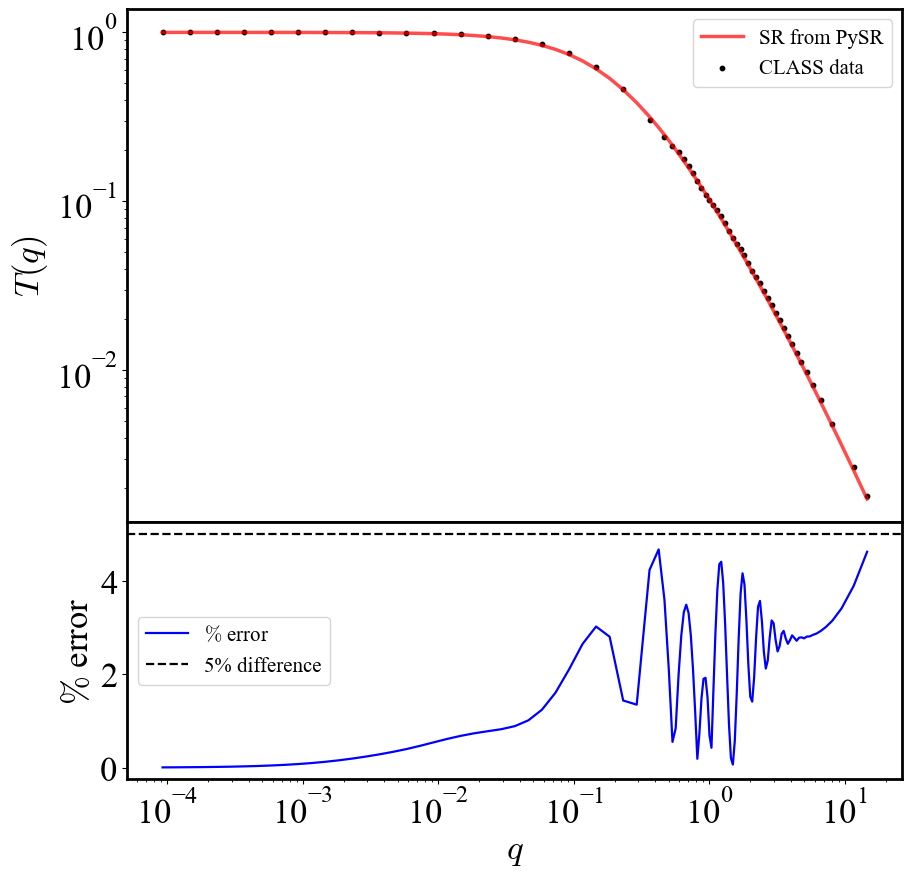

In [24]:
plot1var(x2,T2,'hall_of_fame_2023-10-02_095118.325.pkl')
plt.savefig('presTF3.pdf')